In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [9]:
data = pd.read_csv('data/cleaned_norm_data.csv')

X = data.drop(columns=['id', 'churn'])
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

svc = SVC(random_state=42)

In [11]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [12]:
best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Точність (Precision): {precision:.2f}")
print(f"Повнота (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Найкращі параметри:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Точність: 0.73
Точність (Precision): 0.76
Повнота (Recall): 0.75
F1 Score: 0.75


Точність: 0.73
Точність (Precision): 0.76
Повнота (Recall): 0.75
F1 Score: 0.75


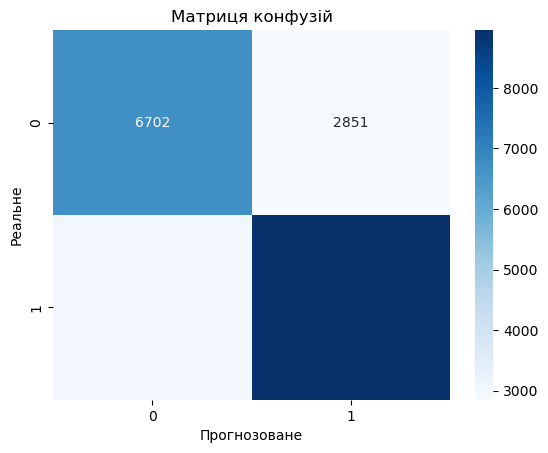

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Точність (Precision): {precision:.2f}")
print(f"Повнота (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця конфузій')
plt.xlabel('Прогнозоване')
plt.ylabel('Реальне')
plt.show()